## Web Crawing
- 웹 페이지에서 데이터를 수집하는 방법에 대해서 학습

### 웹크롤링 방법

#### 웹페이지의 종류
- 정적인 페이지 : 웹 브라우져에 화면이 한번 뜨면 이벤트에 의한 화면의 변경이 없는 페이지 
- 동적인 페이지 : 웹 브라우져에 화면이 뜨고 이벤트가 발생하면 서버에서 데이터를 가져와 화면을 변경하는 페이지

#### requests 이용
서버에서 바로 데이터 받아옴
- 받아오는 문자열에 따라 두가지 방법으로 구분
    - json 문자열로 받아서 파싱하는 방법 : 주로 동적 페이지 크롤링할때 사용 
    - html 문자열로 받아서 파싱하는 방법 : 주로 정적 페이지 크롤링할때 사용
        
#### selenium 이용
- 브라우져를 직접 열어서 데이터를 받는 방법

#### 크롤링 방법에 따른 속도
- requests json > requests html > selenium

### Crwaling Naver Stock Datas
- 네이버 증권 사이트에서 주가 데이터 수집
- 수집할 데이터 : 일별 kospi, kosdaq 주가, 일별 환율(exchange rate) 데이터
- 데이터 수집 절차
    - 웹서비스 분석 : url
    - 서버에 데이터 요청 : request(url) > response : json(str)
    - 서버에서 받은 데이터 파싱(데이터 형태를 변경) : json(str) > list, dict > DataFrame

In [59]:
import warnings
warnings.filterwarnings('ignore') # 경고문구 없애기
import pandas as pd
import requests

#### 1. 웹서비스 분석 : url
- pc 웹페이지가 복잡하면 mobile 웹페이지에서 수집

In [60]:
page, page_size = 1, 10
url ='https://m.stock.naver.com/api/index/KOSPI/price?pageSize=10&page=6'
# 제이슨뷰어 설치 후 깔끔하게 확인 가능

#### 2. 서버에 데이터 요청 : request(url) > response : json(str)
- response의 status code가 200이 나오는지 확인
- 403이나 500이 나오면 request가 잘못되거나 web server에서 수집이 안되도록 설정이 된것임
    - header 설정 또는 selenium 사용
- 200이 나오더라도 response 안에 있는 내용을 확인 > 확인하는 방법 : response.text

In [61]:
response = requests.get(url) #서버에 url에 대한 정보 요청
response

<Response [200]>

In [62]:
response.text[:300] # data type: string

'[{"localTradedAt":"2022-12-19","closePrice":"2,352.17","compareToPreviousClosePrice":"-7.85","compareToPreviousPrice":{"code":"5","text":"하락","name":"FALLING"},"fluctuationsRatio":"-0.33","openPrice":"2,350.78","highPrice":"2,358.76","lowPrice":"2,342.28"},{"localTradedAt":"2022-12-16","closePrice":'

#### 3. 서버에서 받은 데이터 파싱(데이터 형태를 변경) : json(str) > list, dict > DataFrame

In [63]:
type(response) #response클래스 로 만들어진 객체임을 알 수 있음

requests.models.Response

In [64]:
data = response.json() # json은 response 에 포함된 클래스
type(data) #json 메소드를 활용해서 데이터 타입을 list로 변경

list

In [65]:
# 리스트 안에 딕셔너리가 있는 포멧의 데이터는 딕셔너리 하나를 데이터 프레임으로 만들 수 있따.
df = pd.DataFrame(data)[['localTradedAt','closePrice']] #날짜 데이터와 종가 데이터만 가져오기
df

,localTradedAt,closePrice
0,2022-12-19,"2,352.17"
1,2022-12-16,"2,360.02"
2,2022-12-15,"2,360.97"
3,2022-12-14,"2,399.25"
4,2022-12-13,"2,372.40"
5,2022-12-12,"2,373.02"
6,2022-12-09,"2,389.04"
7,2022-12-08,"2,371.08"
8,2022-12-07,"2,382.81"
9,2022-12-06,"2,393.16"


### 위에까지가 URL을 찾아서 Request Response를 한 후에, 받아진 JSON포멧의 문자열 데이터를 데이터프레임까지 만드는 과정 : 동적페이지 수집 과정
* csv, xml 파일 등으로 변환하여 데이터 분석이 가능

#### 4. 함수로 만들기(위의 과정을 간략하게 만들기)

In [66]:
def stock_price(code='KOSPI', page=1, page_size=20): #3개의 파라미터 사용
    '''
    this function is crawling stock price from naver.
    params:
        code: str: KOSPI, KOSDAQ
        page: int
        page_size: int
    return:
        type: DataFrame
    '''
    
    #1. URL
    url = f'https://m.stock.naver.com/api/index/{code}/price?pageSize={page_size}&page={page}'
    
    #2. request(URL) > response: json(str)
    response = requests.get(url)
    
    #3. json(str) > list, dict > DataFrame
    data = response.json()
    return pd.DataFrame(data)[['localTradedAt','closePrice']]

In [67]:
# 실행: 코스피 데이터를  첫번째 페이지 20개 데이터를 가져오고 싶다
#네이버 서버에선 60개까지만 가져올 수 있게 했다.
df = stock_price('KOSPI',1,20)
df

,localTradedAt,closePrice
0,2023-03-03,"2,432.07"
1,2023-03-02,"2,427.85"
2,2023-02-28,"2,412.85"
3,2023-02-27,"2,402.64"
4,2023-02-24,"2,423.61"
5,2023-02-23,"2,439.09"
6,2023-02-22,"2,417.68"
7,2023-02-21,"2,458.96"
8,2023-02-20,"2,455.12"
9,2023-02-17,"2,451.21"


In [68]:
#증권 데이터 수집 추천: finance data reader

In [69]:
# book string 조회 방법
help(stock_price)
# shift + tab 눌러보기(주피터에서)

Help on function stock_price in module __main__:

stock_price(code='KOSPI', page=1, page_size=20)
    this function is crawling stock price from naver.
    params:
        code: str: KOSPI, KOSDAQ
        page: int
        page_size: int
    return:
        type: DataFrame



In [70]:
help(print)

Help on built-in function print in module builtins:

print(...)
    print(value, ..., sep=' ', end='\n', file=sys.stdout, flush=False)
    
    Prints the values to a stream, or to sys.stdout by default.
    Optional keyword arguments:
    file:  a file-like object (stream); defaults to the current sys.stdout.
    sep:   string inserted between values, default a space.
    end:   string appended after the last value, default a newline.
    flush: whether to forcibly flush the stream.



In [71]:
print('A','B', sep=' ', end = '\t')
print('C')

A B	C


In [72]:
type(response) # resonse type 으로 만들어진 객체, 포함되어 있는 메서드 json

requests.models.Response

In [73]:
#메서드 조회
dir(response) #_ 처리는 스페셜 메소드

['__attrs__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_content',
 '_content_consumed',
 '_next',
 'apparent_encoding',
 'close',
 'connection',
 'content',
 'cookies',
 'elapsed',
 'encoding',
 'headers',
 'history',
 'is_permanent_redirect',
 'is_redirect',
 'iter_content',
 'iter_lines',
 'json',
 'links',
 'next',
 'ok',
 'raise_for_status',
 'raw',
 'reason',
 'request',
 'status_code',
 'text',
 'url']

In [74]:
[var for var in dir(response) if var[0] != '_'] #스페셜 메소드 제외하고 보기

['apparent_encoding',
 'close',
 'connection',
 'content',
 'cookies',
 'elapsed',
 'encoding',
 'headers',
 'history',
 'is_permanent_redirect',
 'is_redirect',
 'iter_content',
 'iter_lines',
 'json',
 'links',
 'next',
 'ok',
 'raise_for_status',
 'raw',
 'reason',
 'request',
 'status_code',
 'text',
 'url']

#### 5. 원달러 환율 데이터 수집 : 실습

In [81]:
def exchange_rate(code='FX_USDKRW', page=1):
    #1. URL
    url = f'https://m.stock.naver.com/front-api/v1/marketIndex/prices?page={page}&category=exchange&reutersCode={code}'
    
    #2. Request(URL) > response()
    response=requests.get(url)
    
    #3. json(str) > list, dict >DataFrame 
    data=response.json()['result']
    return pd.DataFrame(data)[['localTradedAt','closePrice']]

In [82]:
kospi_df = stock_price(code='KOSPI')
kospi_df.tail(2)

,localTradedAt,closePrice
18,2023-02-06,"2,438.19"
19,2023-02-03,"2,480.40"


In [83]:
kosdaq_df = stock_price(code='KOSDAQ')
kosdaq_df.tail(2)

,localTradedAt,closePrice
18,2023-02-06,761.33
19,2023-02-03,766.79


In [87]:
#데이터 전처리 데이터 타입 변경
usd_1 = exchange_rate(page=1)
usd_2 = exchange_rate(page=2)
usd_df = pd.concat([usd_1,usd_2],ignore_index=True)
usd_df['usd']=usd_df['closePrice'].apply(lambda data: float(data.replace(',', '')))
usd_df.tail(2)

,localTradedAt,closePrice,usd
18,2023-02-06,"1,258.00",1258.0
19,2023-02-03,"1,251.00",1251.0


In [88]:
kospi_df, kosdaq_df = stock_price(), stock_price(code='KOSDAQ')
kospi_df['kospi']=kospi_df['closePrice'].apply(lambda data: float(data.replace(',', '')))
kosdaq_df['kosdaq']=kosdaq_df['closePrice'].apply(lambda data: float(data.replace(',', '')))

In [89]:
kosdaq_df.dtypes

localTradedAt     object
closePrice        object
kosdaq           float64
dtype: object

In [90]:
df = usd_df.copy() 
df['kospi'] = kospi_df['kospi']
df['kosdaq'] = kosdaq_df['kosdaq']
df = df.drop(columns=['closePrice'])
df.tail(2)

,localTradedAt,usd,kospi,kosdaq
18,2023-02-06,1258.0,2438.19,761.33
19,2023-02-03,1251.0,2480.40,766.79


In [91]:
# lambda : 파라미터와 리턴으로 이루어진 함수를 간단하게 작성하는 방법

# 함수 3개 선언 -> 저장공간 3칸 사용
def plus(n1, n2):
    return n1 + n2

def minus(n1, n2):
    return n1-n2

def calc(func, n1, n2):
    return func(n1, n2)

In [92]:
calc(plus, 1, 2)

3

In [24]:
# 람다 함수 사용 -> 저장공간 1칸 사용
plus_lambda = lambda n1, n2: n1 + n2
plus_lambda(1,2)

3

In [25]:
calc(lambda n1, n2: n1 +n2, 1, 2)

3

In [26]:
def calc2(func, n1, n2):
    return func(n1, n2)

calc2(lambda n1, n2: n1 +n2, 1, 2)

3

In [27]:
#얕은복사, 깊은복사
data1 = [1, 2, 3]
data2 = data1 # 얕은복사, 같은 데이터공간을 참조(주소복사)
data3 = data1.copy() # 깊은복사 : 데이터 복사, 다른 데이터공간을 참조
print(data1, data2, data3)
data2[1] = 4
print(data1, data2, data3)

[1, 2, 3] [1, 2, 3] [1, 2, 3]
[1, 4, 3] [1, 4, 3] [1, 2, 3]


In [28]:
#주소값 출력, data3만 다른 주소값을 보여주고 있다.
id(data1), id(data2), id(data3)  

(1394281240192, 1394281240192, 1394279875456)

#### 6. 시각화

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
df.tail(2)

,localTradedAt,usd,kospi,kosdaq
18,2023-02-06,1258.0,2438.19,761.33
19,2023-02-03,1251.0,2480.40,766.79


<function matplotlib.pyplot.show(close=None, block=None)>

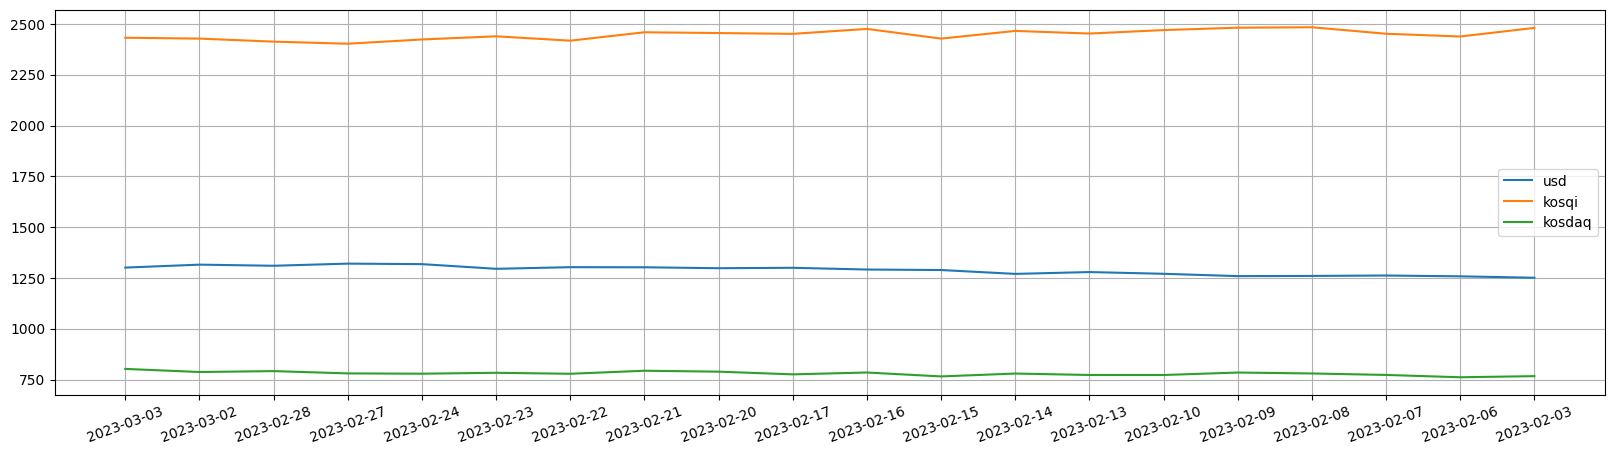

In [31]:
plt.figure(figsize=(20,5)) # 사이즈 조절
plt.plot(df['localTradedAt'],df['usd'], label='usd')
plt.plot(df['localTradedAt'],df['kospi'], label='kosqi')
plt.plot(df['localTradedAt'],df['kosdaq'], label='kosdaq')
plt.xticks(rotation = 20) #x축 각도 조절
plt.legend()
plt.grid()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

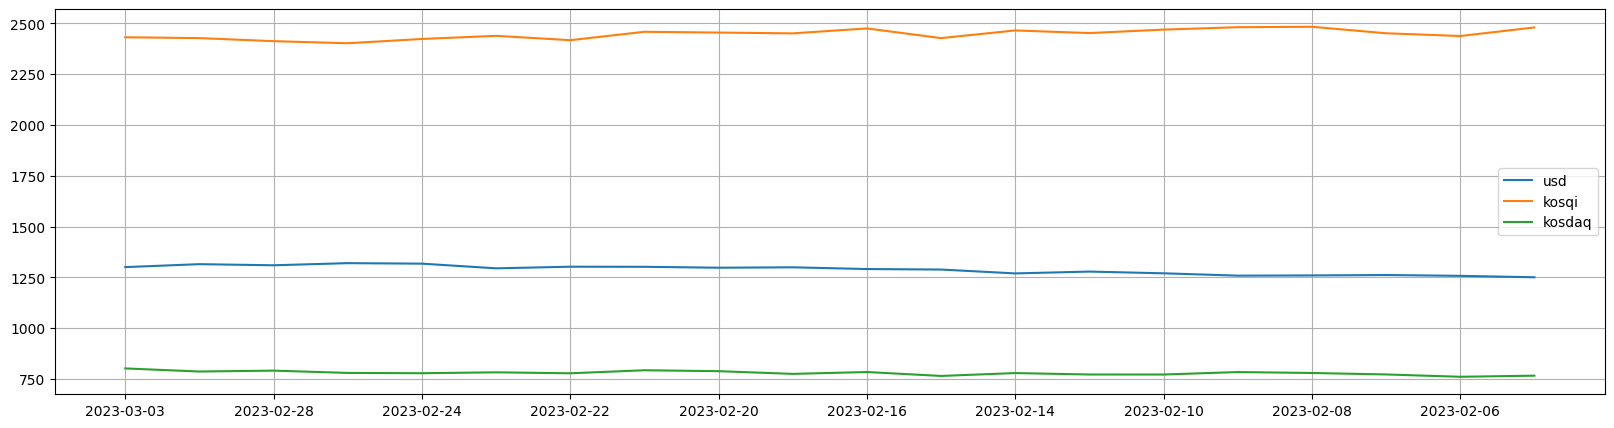

In [32]:
plt.figure(figsize=(20,5))
plt.plot(df['localTradedAt'],df['usd'], label='usd')
plt.plot(df['localTradedAt'],df['kospi'], label='kosqi')
plt.plot(df['localTradedAt'],df['kosdaq'], label='kosdaq')
plt.xticks(df['localTradedAt'][::2]) #x 축 거리 조절, 마스킹 문법
plt.legend()
plt.grid()
plt.show

#### 7. 데이터 스케일링 (y축 조절해서 비교하기 편하게)
- min max scaling


- $z = \frac{x_i - min(x)}{max(x) - min(x)} (0 \leqq z \leqq 1)$


- latex syntax : `https://jjycjnmath.tistory.com/117`

In [94]:
from sklearn.preprocessing import minmax_scale

In [95]:
minmax_scale(df['usd'])

array([0.71942446, 0.92805755, 0.84892086, 1.        , 0.96402878,
       0.63309353, 0.74820144, 0.74100719, 0.67625899, 0.70503597,
       0.58273381, 0.54676259, 0.27338129, 0.4028777 , 0.28057554,
       0.11510791, 0.1294964 , 0.15827338, 0.10071942, 0.        ])

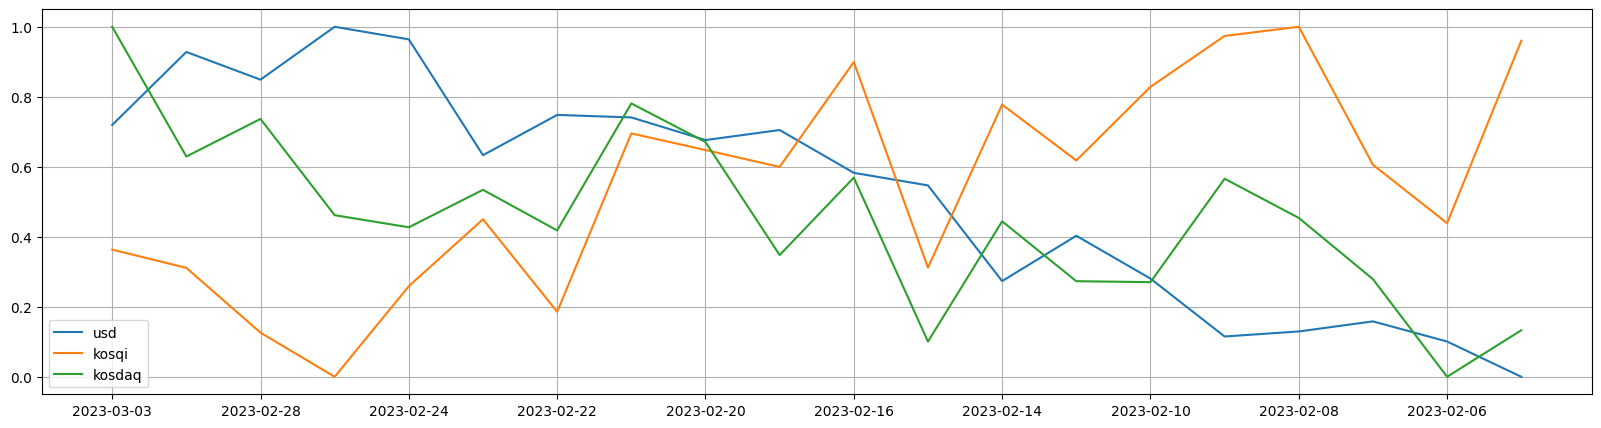

In [96]:
plt.figure(figsize=(20,5))
plt.plot(df['localTradedAt'],minmax_scale(df['usd']), label='usd')
plt.plot(df['localTradedAt'],minmax_scale(df['kospi']), label='kosqi')
plt.plot(df['localTradedAt'],minmax_scale(df['kosdaq']), label='kosdaq')
plt.xticks(df['localTradedAt'][::2]) #x 축 거리 조절
plt.legend()
plt.grid()
plt.show()

#### 8. 상관관계 분석
- 피어슨 상관계수(Pearson Correlation Coefficient)
- 두 데이터 집합의 상관도를 분석할때 사용되는 지표
- 상관계수의 해석
    - -1에 가까울수록 서로 반대방향으로 움직임
    - 1에 가까울수록 서로 같은방향으로 움직임
    - 0에 가까울수록 두 데이터는 관계가 없음

In [36]:
df.corr()

,usd,kospi,kosdaq
usd,1.000000,-0.742683,0.533018
kospi,-0.742683,1.000000,-0.126323
kosdaq,0.533018,-0.126323,1.000000


In [37]:
# 평균적
# usd - kospi : -0.5
# kosdaq - kospi : 0.9